In [1]:
import sys
import os

# 1. Lấy đường dẫn tuyệt đối của thư mục hiện tại (notebooks)
current_dir = os.getcwd()

# 2. Lấy đường dẫn của thư mục cha (MODELS)
project_root = os.path.dirname(current_dir)

# 3. Thêm thư mục cha vào hệ thống tìm kiếm module của Python
if project_root not in sys.path:
    sys.path.append(project_root)

# Kiểm tra xem đã thêm đúng chưa (Optional)
print(f"Project Root added: {project_root}")

Project Root added: d:\Coding\School\Y3-K1\Intro2ML\Lab 2 - Softmax  Regression\src\Intro2ML-Lab02-SoftmaxRegression\MODELS


In [2]:
from models.utils.loader import *
from models.utils.visualize import *
from models.metrics import *
from models.softmax_regression import *
from models.model_pixel import PixelSoftmax
from models.model_edge import EdgeSoftmax
from models.model_pca import PCASoftmax
from models.model_block import BlockSoftmax
from models.model_hog import HOGSoftmax

(60000, 1) (60000, 50)
(10000, 1) (10000, 50)
Accuracy: 0.9123


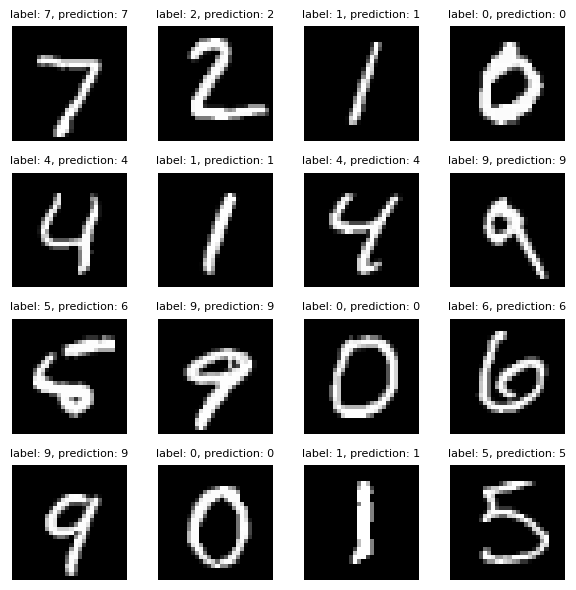

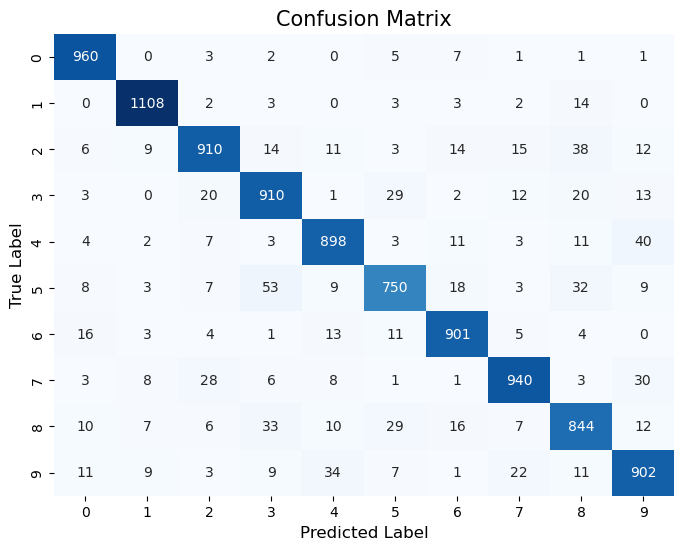

In [3]:
datapath = os.path.join(project_root, 'data/mnist_data.npz')
X_train, y_train, X_test, y_test = load_dataset(datapath)

model = PCASoftmax(50, 10)

model.fit(X_train.reshape(X_train.shape[0], -1), y_train, learning_rate=0.1, epochs=100, verbose=False)

y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))

print(f"Accuracy: {accuracy(y_pred, y_test)}")

plt.figure(figsize=(6,6))

for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_test[i], cmap='gray')
    plt.axis('off')
    plt.title(f'label: {y_test[i]}, prediction: {y_pred[i]}', fontsize=8)

plt.tight_layout()
plt.show()

cm = confusion_matrix(y_test, y_pred, num_classes=10)

plot_confusion_matrix(cm, range(10))

In [4]:
from PIL import Image

img = Image.open('download (1).png')
# img.show()

np_img = np.asarray(img, dtype=np.float32)
np_img = np_img.reshape(28,28)


image = np.asarray([X_train[2], X_train[432], np_img, np_img])

print(model.predict(image), y_train[2], y_train[432])

tesst = np.asarray([X_train[2], X_train[432], np_img, np_img, np_img])
print(model.predict(tesst))


(4, 1) (4, 50)
[4 2 5 5] 4 2
(5, 1) (5, 50)
[4 2 5 5 5]


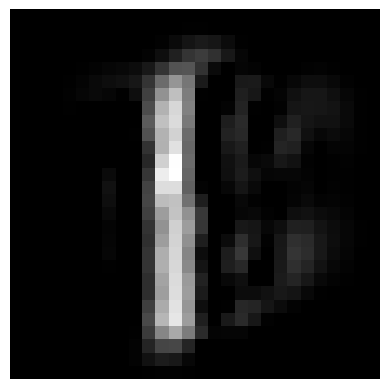

In [5]:
np_img = np_img.reshape(1, 28,28)
# X_test[15]
# Image.show(model.get_feature_visualization(np_img))

import matplotlib.pyplot as plt


plt.imshow(model.get_feature_visualization(np_img), cmap='gray')
plt.axis('off')
plt.show()

In [6]:
# print(np_img)
print(model.predict(X_train[4].reshape(1, 28, 28)))


(1, 1) (1, 50)
[9]


In [7]:
model2 = PCASoftmax(50, 10)
model2.load_weight("D:\Coding\School\Y3-K1\Intro2ML\Lab 2 - Softmax  Regression\src\Intro2ML-Lab02-SoftmaxRegression\MODELS\models\weights\pca_best.npz")

PCASoftmax model loaded successfully from D:\Coding\School\Y3-K1\Intro2ML\Lab 2 - Softmax  Regression\src\Intro2ML-Lab02-SoftmaxRegression\MODELS\models\weights\pca_best.npz


True

In [8]:
model3 = BlockSoftmax(10, grid_size=(14,14))
model3.fit(X_train.reshape(X_train.shape[0], -1), y_train, learning_rate=0.1, epochs=100, verbose=False)
# model3.load_weight("D:\Coding\School\Y3-K1\Intro2ML\Lab 2 - Softmax  Regression\src\Intro2ML-Lab02-SoftmaxRegression\MODELS\models\weights\edge_best.npz")

Applying Block Averaging (14, 14)...
Block Feature shape: (60000, 196)
(60000, 1) (60000, 196)


In [9]:
for i in range(4, 20):
    print(model3.predict(X_train[i].reshape(1, 28, 28)), y_train[i])
    print(model3.predict_proba(X_train[i].reshape(1, 28, 28)), y_train[i])

(1, 1) (1, 196)
[9] 9
(1, 1) (1, 196)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] 9
(1, 1) (1, 196)
[2] 2
(1, 1) (1, 196)
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]] 2
(1, 1) (1, 196)
[1] 1
(1, 1) (1, 196)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] 1
(1, 1) (1, 196)
[3] 3
(1, 1) (1, 196)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]] 3
(1, 1) (1, 196)
[1] 1
(1, 1) (1, 196)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] 1
(1, 1) (1, 196)
[4] 4
(1, 1) (1, 196)
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]] 4
(1, 1) (1, 196)
[3] 3
(1, 1) (1, 196)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]] 3
(1, 1) (1, 196)
[5] 5
(1, 1) (1, 196)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]] 5
(1, 1) (1, 196)
[3] 3
(1, 1) (1, 196)
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]] 3
(1, 1) (1, 196)
[6] 6
(1, 1) (1, 196)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]] 6
(1, 1) (1, 196)
[1] 1
(1, 1) (1, 196)
[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]] 1
(1, 1) (1, 196)
[9] 7
(1, 1) (1, 196)
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 1.63258807e-40
  0.00000000e+00 1.00000